In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import nltk

In [2]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.iloc[:,[0,1]]

In [5]:
df = df.rename(columns={"v1":"spam", "v2":'text'})

In [6]:
df

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Feature engineering

In [7]:
for i in range(df["spam"].size):
    row = df.loc[i, "spam"]
    if row == "ham":
        df.loc[i, "spam"] = 0
    elif row == "spam":
        df.loc[i, "spam"] = 1

In [8]:
df

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

spam    0
text    0
dtype: int64

In [10]:
for i in df.text[:4]:
    print(i)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...


In [11]:
n_spam = df[df.spam == 1].size
n_clear = df[df.spam == 0].size

In [12]:
spam_length = 0
for i in df[df.spam == 1]["text"]:
    spam_length += len(i)
avg_spam_length = spam_length/n_spam
print(f"Average spam messages length is {avg_spam_length}")

Average spam messages length is 69.4330655957162


In [13]:
clear_length = 0
for i in df[df.spam == 0]["text"]:
    clear_length += len(i)
avg_clear_length = clear_length/n_clear
print(f"Average clear messages length is {avg_clear_length}")

Average clear messages length is 35.51181347150259


In [14]:
# We see that spam messages are longer than clear messages.
# It is a good observation. We can add length of message as a new feature.

In [15]:
df["length"] = df["text"].apply(len)

In [16]:
df

,spam,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [17]:
nums = "0123456789"

In [18]:
spam_nums = 0
for i in df[df["spam"] == 1]["text"]:
    count = 0
    for j in i:
        if j in nums:
            count += 1
    spam_nums += count
avg_spam_nums = spam_nums/n_spam
print(f"Average number of numbers in spam messages is {avg_spam_nums}")

Average number of numbers in spam messages is 7.879518072289157


In [19]:
clear_nums = 0
for i in df[df["spam"] == 0]["text"]:
    count = 0
    for j in i:
        if j in nums:
            count += 1
    clear_nums += count
avg_clear_nums = clear_nums/n_clear
print(f"Average number of numbers in clear messages is {avg_clear_nums}")

Average number of numbers in clear messages is 0.14963730569948186


In [20]:
# We see that spam messages often have numbers in text like phone numbers, accounts and etc.

In [21]:
df["numbers"] = df["text"].str.count("\d")

In [22]:
df

,spam,text,length,numbers
0,0,"Go until jurong point, crazy.. Available only ...",111,0
1,0,Ok lar... Joking wif u oni...,29,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25
3,0,U dun say so early hor... U c already then say...,49,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,21
5568,0,Will Ì_ b going to esplanade fr home?,37,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,0
5570,0,The guy did some bitching but I acted like i'd...,125,0


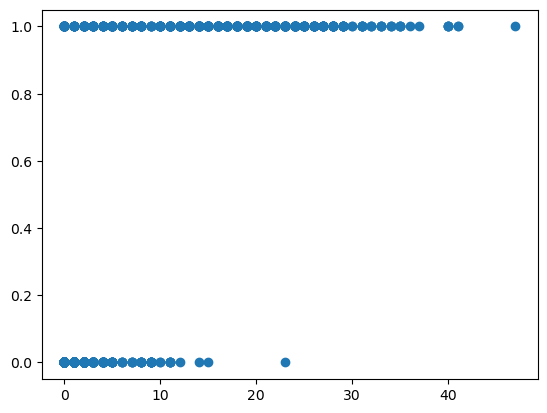

In [23]:
plt.scatter(x="numbers", y="spam", data = df)

# Building a simple ml classififer

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(columns=["spam", "text"])

In [127]:
y = df["spam"]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.33, random_state=42)

In [138]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
X_train

,length,numbers
3235,92,0
945,59,0
5319,28,0
5528,49,0
247,31,1
...,...,...
3772,71,0
5191,22,0
5226,45,0
5390,26,0


In [134]:
from sklearn import preprocessing
from sklearn import utils

In [135]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [136]:
y_transformed

array([0, 0, 1, ..., 0, 0, 0])

In [140]:
clf = DecisionTreeClassifier(random_state=0)

In [141]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [145]:
clf.score(X_test, y_test)

0.9744426318651441

In [150]:
# Wow! 97% accuracy is so good using only 2 features to fit out model.
# I didn't expect such results!

# NLP

In [26]:
import re
import string

In [27]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [28]:
df["message_clean"] = df["text"].apply(clean_text)

In [29]:
df.head()

,spam,text,length,numbers,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,0,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,0,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,49,0,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,nah i dont think he goes to usf he lives aroun...


In [30]:
for i in df['message_clean'][:5]:
    print(i)

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in  a wkly comp to win fa cup final tkts  may  text fa to  to receive entry questionstd txt ratetcs apply 
u dun say so early hor u c already then say
nah i dont think he goes to usf he lives around here though


In [31]:
# I took that clean function from kaggle. Why it removed all numbers?
# As we saw before, number of numbers is a good feature for this dataset

In [32]:
# Stopwords

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/yahor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [36]:
df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()

,spam,text,length,numbers,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,0,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,free entry wkly comp win fa cup final tkts m...
3,0,U dun say so early hor... U c already then say...,49,0,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,nah dont think goes usf lives around though


In [183]:
# Stemming

In [37]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [38]:
df['message_clean'] = df['message_clean'].apply(stemm_text)
df.head()

,spam,text,length,numbers,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,0,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,free entri wkli comp win fa cup final tkts m...
3,0,U dun say so early hor... U c already then say...,49,0,dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,nah dont think goe usf live around though


In [47]:
# Text to 0, 1
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df['spam'])

# df['target_encoded'] = le.transform(df['spam'])
# df.head()
# df = df.drop("target_encoded", axis=1)

In [52]:
# So, now we have messages as list of tokens(lemmas)

In [53]:
X = df["message_clean"]
y = df["spam"]

In [56]:
X.shape, y.shape

((5572,), (5572,))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
X_train

4281                                                 call
585                 tell headach want use  hour sick time
4545    never tri alon take weight tear come ur heart ...
3034    rajipl favour pls convey birthday wish nimya p...
2758                                     time iû÷m prob 
                              ...                        
3772           came hostel go sleep plz call class hrishi
5191                                 sorri ill call later
5226                   prabhaim sorydarealyfrm heart sori
5390                                 nt joke serious told
860                                           work go min
Name: message_clean, Length: 4179, dtype: object

In [65]:
#Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [68]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(X_train)
x_test_dtm = vect.transform(X_test)

In [70]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<4179x5717 sparse matrix of type '<class 'numpy.float64'>'
	with 32431 stored elements in Compressed Sparse Row format>

In [74]:
from keras.preprocessing.text import Tokenizer

2024-08-07 21:34:17.426541: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 21:34:17.962098: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 21:34:18.839778: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [73]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

NameError: name 'Tokenizer' is not defined

# Test with downloaded model from huggingface

In [154]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert-tiny-finetuned-sms-spam-detection")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/bert-tiny-finetuned-sms-spam-detection")

/home/yahor/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [158]:
# splitting the data
train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'].tolist(), df['spam'].tolist(), test_size=0.2)

In [159]:
# tokenize the data
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors="pt")

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

In [160]:
from torch.utils.data import Dataset, DataLoader

In [161]:
# create datasets and dataloaders
class SMSDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SMSDataset(train_encodings, train_labels)
val_dataset = SMSDataset(val_encodings, val_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [162]:
# define the training loop
from transformers import AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm.auto import tqdm

model = AutoModelForSequenceClassification.from_pretrained("mrm8488/bert-tiny-finetuned-sms-spam-detection")

optimizer = AdamW(model.parameters(), lr=5e-5)

num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

2024-08-06 11:28:08.073987: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 11:28:08.565499: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 11:28:09.968037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/yahor/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `

  0%|          | 0/1674 [00:00<?, ?it/s]

/tmp/ipykernel_5359/980936326.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [163]:
# evaluate the model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model.eval()
predictions, true_labels = [], []

for batch in val_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    
    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
    true_labels.extend(batch["labels"].cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='binary')

print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")

/tmp/ipykernel_5359/980936326.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Validation Accuracy: 0.9910313901345291
Validation Precision: 0.993006993006993
Validation Recall: 0.9403973509933775


In [164]:
# 99% accuracy is ideal!